In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the data
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'text']

FileNotFoundError: [Errno 2] No such file or directory: 'spam.csv'

In [ ]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['text'])
y = data['label'].map({'ham': 0, 'spam': 1})

In [ ]:
# Design the model
model = LogisticRegression()

# Extract embeddings before training
embeddings_before = X.toarray()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

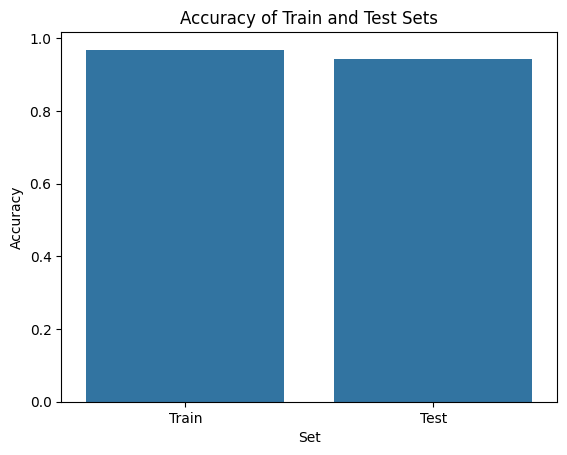

In [ ]:
# Collect the loss and metrics
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Plot the metrics
metrics = pd.DataFrame({
    'Set': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy]
})

sns.barplot(x='Set', y='Accuracy', data=metrics)
plt.title('Accuracy of Train and Test Sets')
plt.show()

In [ ]:
# Calculate and display the test performance
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", classification_report(y_test, test_preds))

Test Accuracy: 0.9443946188340807
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.97      0.61      0.75       150

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115



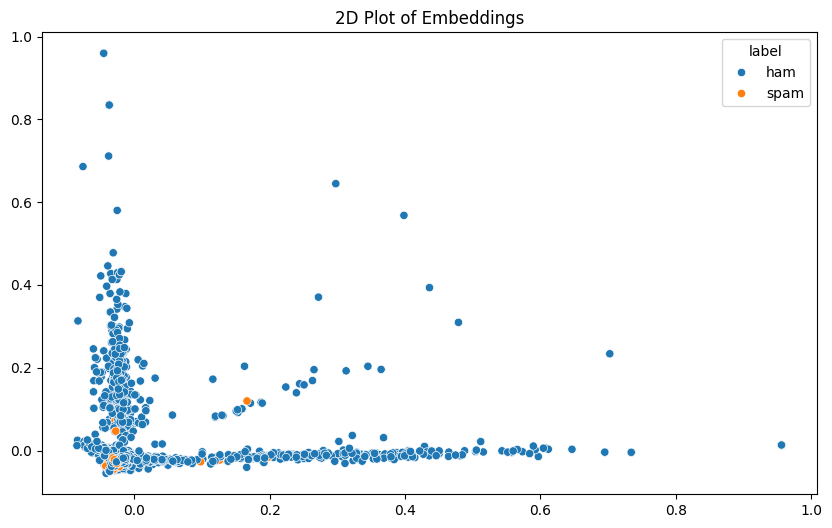

In [ ]:
# Extract embeddings after training
embeddings_after = model.predict_proba(X)[:, 1]

# Reduce the embeddings using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_before)

# Plot the embeddings in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=data['label'])
plt.title('2D Plot of Embeddings')
plt.show()

